In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from rake_nltk import Rake

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [8]:
!pwd

/home/sebastien/code/CuevasEli/NLP-Systematic-review


In [10]:
df = pd.read_csv('/home/sebastien/code/CuevasEli/NLP-Systematic-review/raw_data/data.csv')

In [11]:
df.shape

(190654, 2)

In [12]:
df.head()

,abstract_id,abstract_text
0,1279170,We conducted this study to assess the clinical...
1,1281030,To determine whether prophylactic treatment wi...
2,1282364,After the discovery of type C hepatitis virus ...
3,1283117,Since it is not clear whether testosterone or ...
4,1283730,The aim was to study the pharmacokinetic param...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190654 entries, 0 to 190653
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   abstract_id    190654 non-null  int64 
 1   abstract_text  190654 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.9+ MB


In [20]:
df['text_len'] = df['abstract_text'].apply(lambda x: len(x))

<Axes: xlabel='text_len', ylabel='Count'>

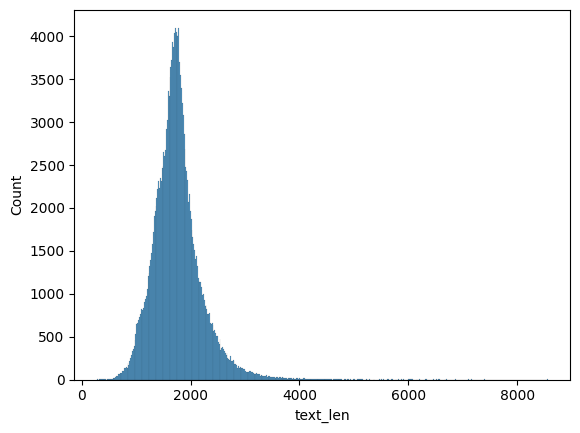

In [22]:
sns.histplot(df['text_len'])

In [37]:
df_test = df['abstract_text'].head(100)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_test)

In [40]:
df_token = tokenizer.texts_to_sequences(df_test)

df_pad = pad_sequences(df_token, dtype='float32', padding='post', maxlen=4000)

In [42]:
vocab_size = len(tokenizer.index_word)
vocab_size

3485

In [46]:
from gensim import corpora, models
#!pip install gensim
#df_token

In [47]:
# Create a dictionary from the preprocessed text data
dictionary = corpora.Dictionary(df_token)

# Create the document-term matrix
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Train the LDA model
num_topics = 5  # Adjust this according to your needs
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

TypeError: decoding to str: need a bytes-like object, int found